# Prep DATA SET

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle

In [22]:
#adding path to data and defining categories
DATADIR = "C:/Users/soumy/Desktop/ML/Data"
CATEGORIES = ["Male" , "Female"]

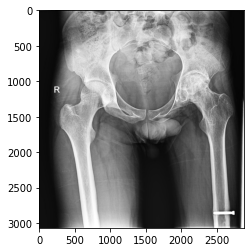

In [23]:
#loading data into array
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):  # iterate over each image
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  
    break  

In [24]:
print(img_array.shape)

(3068, 2884)


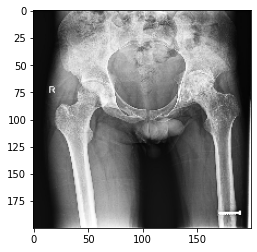

In [25]:
#resizing every image
IMG_SIZE = 200
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap = "gray")

In [26]:
training_data = []

def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=female 1=male

        for img in os.listdir(path):  # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:   #ignores few errors
                pass


create_training_data()

print(len(training_data))

237


In [27]:
#shuffle data

random.shuffle(training_data)

In [28]:
for sample in training_data[:2]:
    print(sample)

[array([[46, 46, 46, ..., 41, 41, 41],
       [46, 46, 46, ..., 41, 41, 41],
       [46, 46, 46, ..., 41, 41, 41],
       ...,
       [53, 53, 53, ..., 49, 49, 50],
       [53, 53, 53, ..., 49, 49, 49],
       [53, 53, 53, ..., 49, 49, 49]], dtype=uint8), 1]
[array([[143, 143, 143, ..., 143, 143, 143],
       [  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [139, 139, 139, ..., 139, 139, 139],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 0]


In [29]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
#convert list to np array
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [30]:
#save the arrays
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [42]:
import tensorflow as tf
import datetime

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
%load_ext tensorboard
log_dir = "logs\\fit\\"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [43]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

In [44]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 2D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=25, epochs=20, validation_split=0.2, callbacks=[tensorboard_callback])

Train on 189 samples, validate on 48 samples
Epoch 1/20
189/189 [==============================] - 6s 34ms/sample - loss: 1.1824 - accuracy: 0.5608 - val_loss: 0.5586 - val_accuracy: 0.7708
Epoch 2/20
189/189 [==============================] - 5s 29ms/sample - loss: 0.6528 - accuracy: 0.6296 - val_loss: 0.5881 - val_accuracy: 0.7708
Epoch 3/20
189/189 [==============================] - 6s 29ms/sample - loss: 0.6543 - accuracy: 0.6296 - val_loss: 0.6494 - val_accuracy: 0.7708
Epoch 4/20
189/189 [==============================] - 5s 29ms/sample - loss: 0.6408 - accuracy: 0.6561 - val_loss: 0.6240 - val_accuracy: 0.7708
Epoch 5/20
189/189 [==============================] - 6s 29ms/sample - loss: 0.5626 - accuracy: 0.7143 - val_loss: 0.5121 - val_accuracy: 0.7917
Epoch 6/20
189/189 [==============================] - 6s 30ms/sample - loss: 0.5082 - accuracy: 0.7725 - val_loss: 0.5189 - val_accuracy: 0.7917
Epoch 7/20
189/189 [==============================] - 6s 30ms/sample - loss: 0.3745 -

In [50]:
!kill 3532
%tensorboard --logdir logs/fit

'kill' is not recognized as an internal or external command,
operable program or batch file.


Reusing TensorBoard on port 6006 (pid 3532), started 0:01:52 ago. (Use '!kill 3532' to kill it.)